In [1]:
import json
import re

import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("bench.json") as f:
    data = json.load(f)["benchmarks"]
data

[{'name': 'BM_Minimize<tb::NaiveMinimize>/1000000',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::NaiveMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 3,
  'real_time': 242391085.8730475,
  'cpu_time': 242387030.33333334,
  'time_unit': 'ns'},
 {'name': 'BM_Minimize<tb::DequeMinimize>/1000000',
  'family_index': 1,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::DequeMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 32,
  'real_time': 21740584.881627,
  'cpu_time': 21740389.75000001,
  'time_unit': 'ns'},
 {'name': 'BM_Minimize<tb::InplaceMinimize>/1000000',
  'family_index': 2,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::InplaceMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 33,
  'real

In [3]:
with open("bench.json") as f:
    data = json.load(f)

df_benchmarks = pl.from_dicts(
    [
        {
            **run,
            "n_bases": int(run["name"].split("/")[1]),
            "function": re.search(r"(?<=<)(.*?)(?=>)", run["name"]).group(),
        }
        for run in data["benchmarks"]
    ]
)

df_benchmarks

name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,n_bases,function
str,i64,i64,str,str,i64,i64,i64,i64,f64,f64,str,i64,str
"""BM_Minimize<tb::NaiveMinimize>…",0,0,"""BM_Minimize<tb::NaiveMinimize>…","""iteration""",1,0,1,3,2.4239e8,2.4239e8,"""ns""",1000000,"""tb::NaiveMinimize"""
"""BM_Minimize<tb::DequeMinimize>…",1,0,"""BM_Minimize<tb::DequeMinimize>…","""iteration""",1,0,1,32,2.1741e7,2.1740e7,"""ns""",1000000,"""tb::DequeMinimize"""
"""BM_Minimize<tb::InplaceMinimiz…",2,0,"""BM_Minimize<tb::InplaceMinimiz…","""iteration""",1,0,1,33,2.1296e7,2.1296e7,"""ns""",1000000,"""tb::InplaceMinimize"""
"""BM_Minimize<tb::RingMinimize>/…",3,0,"""BM_Minimize<tb::RingMinimize>/…","""iteration""",1,0,1,26,2.6439e7,2.6439e7,"""ns""",1000000,"""tb::RingMinimize"""
"""BM_Minimize<tb::ArgminMinimize…",4,0,"""BM_Minimize<tb::ArgminMinimize…","""iteration""",1,0,1,47,1.5023e7,1.5023e7,"""ns""",1000000,"""tb::ArgminMinimize"""
"""BM_Minimize<tb::ArgminRecovery…",5,0,"""BM_Minimize<tb::ArgminRecovery…","""iteration""",1,0,1,72,9.7662e6,9.7664e6,"""ns""",1000000,"""tb::ArgminRecoveryMinimize"""
"""BM_Minimize<tb::ArgminRecovery…",6,0,"""BM_Minimize<tb::ArgminRecovery…","""iteration""",1,0,1,53,1.3111e7,1.3111e7,"""ns""",1000000,"""tb::ArgminRecoveryEveMinimize"""


In [4]:
x_ticks = df_benchmarks["n_bases"].unique().sort()
y_ticks = df_benchmarks["real_time"].unique().sort().to_numpy()

Text(0.5, 23.52222222222222, 'base pairs')

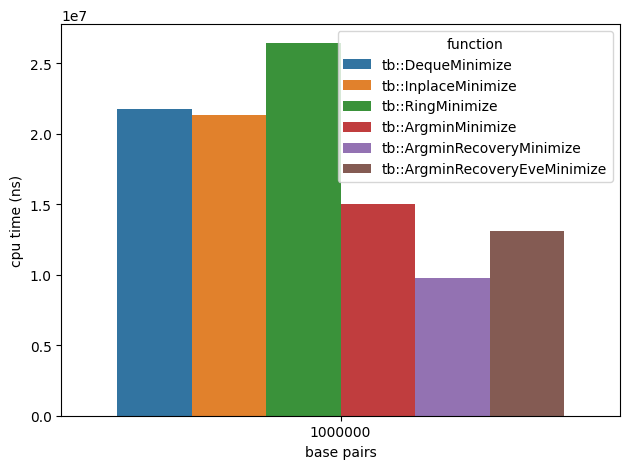

In [5]:
fig = sns.barplot(
    df_benchmarks.filter(pl.col("function") != "tb::NaiveMinimize"),
    x="n_bases",
    y="cpu_time",
    hue="function",
)
plt.tight_layout()
fig.set_ylabel("cpu time (ns)")
fig.set_xlabel("base pairs")

In [6]:
print(
    df_benchmarks.group_by("function")
    .agg(
        (pl.col("cpu_time") / pl.col("n_bases")).first().alias("avg ns per bp"),
    )
    .sort("avg ns per bp", descending=True)
    .to_pandas()
    .to_markdown(index=False)
)

| function                      |   avg ns per bp |
|:------------------------------|----------------:|
| tb::NaiveMinimize             |       242.387   |
| tb::RingMinimize              |        26.4385  |
| tb::DequeMinimize             |        21.7404  |
| tb::InplaceMinimize           |        21.2961  |
| tb::ArgminMinimize            |        15.0231  |
| tb::ArgminRecoveryEveMinimize |        13.111   |
| tb::ArgminRecoveryMinimize    |         9.76643 |
